<a href="https://colab.research.google.com/github/MashaKubyshina/Learning_to_code/blob/master/Statistics_Basics_Anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

In [ ]:
# Main question: Is any of the individual parameters (sex and hormone) create stat. sign. between groups?
# We have 2 predictors (sex and hormone), that predict the result (var4)
# Our Zero hypothesis (H-zero) is that the results between groups are not statistically significant
# For H-zero to be true F has to be very small (close to 0) and P > 0.05
# A statistically significant test result (P ≤ 0.05) means that the Zerp hypothesis is false or should be rejected
# For the results to be statistically significant F has to be not too small, definetly not close to 0 and P < 0.05
# (P > 0.05 is the probability that the null hypothesis is true)

# Process followed:

# 1. Import libraries
# 2. Import and read dataset
# 3. Clean dataset
# 4. Do EDA (exploratory data analysis) to see the data
# 5. Find F and P
# 6. Conclusion

In [1]:
# 1. Import libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import scipy.stats as stats

# Import and Read Dataset

In [2]:
# 2. Import and read dataset

url = 'https://stepik.org/media/attachments/lesson/9250/birds.csv'

df = pd.read_csv(url, header=None, sep=',')

In [3]:
df

,0,1,2
0,var4,hormone,sex
1,17.859039225112,1,1
2,20.8423434475719,1,1
3,19.3180990285089,1,1
4,20.0644505810577,1,1
...,...,...,...
60,17.0541946210175,0,0
61,22.9515507831087,0,0
62,18.7993820244873,0,0
63,16.5431612681593,0,0


In [4]:
df.columns

Int64Index([0, 1, 2], dtype='int64')

# Clean Dataset

In [5]:
# 3. Clean dataset

# We need to clean the data: drop the first row and move column labels to header

# We set the column labels to equal the values in the 1st row (index location 0):

df.columns  = df.iloc[0]

df

,var4,hormone,sex
0,var4,hormone,sex
1,17.859039225112,1,1
2,20.8423434475719,1,1
3,19.3180990285089,1,1
4,20.0644505810577,1,1
...,...,...,...
60,17.0541946210175,0,0
61,22.9515507831087,0,0
62,18.7993820244873,0,0
63,16.5431612681593,0,0


In [6]:
# Then we drop the 1st row using iloc
# We will save the new dataset as df_cleaned and will use this dataset from the rest of the operations

df_cleaned=df.iloc[pd.RangeIndex(len(df)).drop(0)]
df_cleaned

,var4,hormone,sex
1,17.859039225112,1,1
2,20.8423434475719,1,1
3,19.3180990285089,1,1
4,20.0644505810577,1,1
5,17.6203158537085,1,1
...,...,...,...
60,17.0541946210175,0,0
61,22.9515507831087,0,0
62,18.7993820244873,0,0
63,16.5431612681593,0,0


In [7]:
df_cleaned.columns

Index(['var4', 'hormone', 'sex'], dtype='object', name=0)

In [8]:
df_cleaned.head

<bound method NDFrame.head of 0               var4 hormone sex
1    17.859039225112       1   1
2   20.8423434475719       1   1
3   19.3180990285089       1   1
4   20.0644505810577       1   1
5   17.6203158537085       1   1
..               ...     ...  ..
60  17.0541946210175       0   0
61  22.9515507831087       0   0
62  18.7993820244873       0   0
63  16.5431612681593       0   0
64  25.6830383288827       0   0

[64 rows x 3 columns]>

In [9]:
df_cleaned.shape

(64, 3)

In [18]:
# We convert the 'var4' column to numeric:

df_cleaned.var4 = pd.to_numeric(df_cleaned['var4'],errors='coerce')


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# EDA (exploratory data analysis)

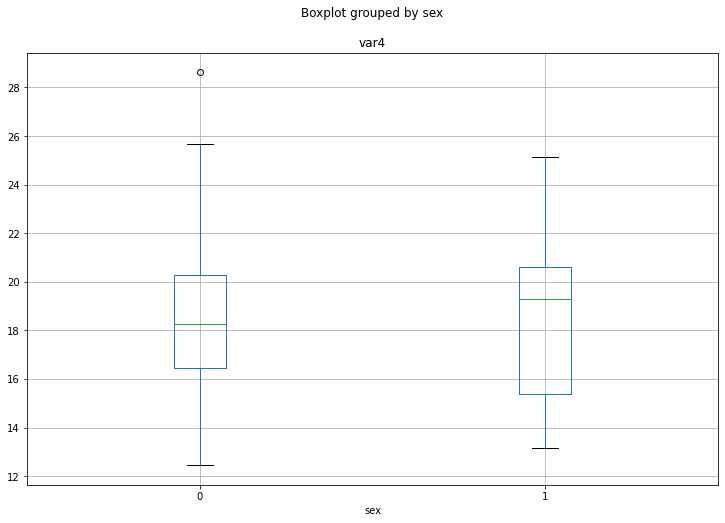

In [19]:
# 4. Do EDA (exploratory data analysis) to see the data

# Let's explore data looking at boxplot by sex
# We can see the overlap of medians and boxes

df_cleaned.boxplot('var4', by='sex', figsize=(12,8), grid=True)

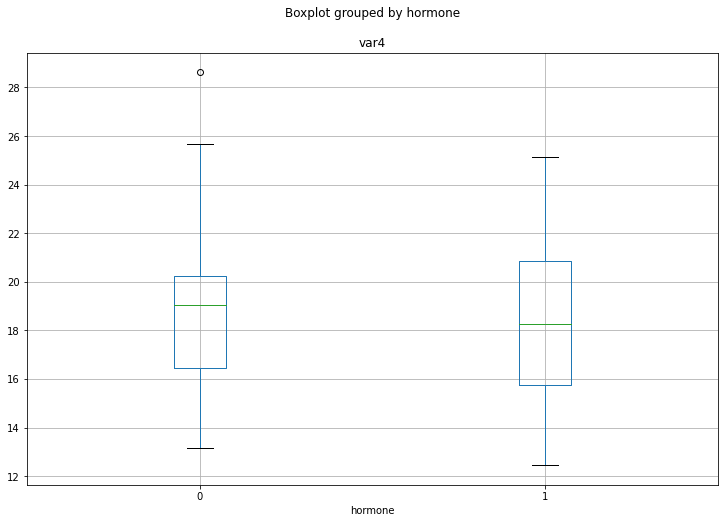

In [20]:
# 4. Do EDA (exploratory data analysis) to see the data

# Let's explore data looking at boxplot by hormone
# Again we see overlap

df_cleaned.boxplot('var4', by='hormone', figsize=(12,8), grid=True)

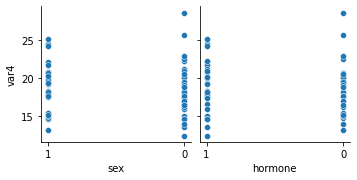

In [21]:
# another view is via pairplot (not too useful here)

import seaborn as sns

sns.pairplot(df_cleaned, y_vars="var4", x_vars=['sex','hormone'])

# Find F and P

In [24]:
# 5. Find F and P

# Explore different F and P

# Having P > 0.05 and F over 3, tells us that when compared all 4 gouprs there is no stat. sign., but the results are "on the border"


S0H0 = df_cleaned[(df_cleaned['sex'] == '0') & (df_cleaned['hormone'] == '0')]['var4']
S1H0 = df_cleaned[(df_cleaned['sex'] == '1') & (df_cleaned['hormone'] == '0')]["var4"]
S0H1 = df_cleaned[(df_cleaned['sex'] == '0') & (df_cleaned['hormone'] == '1')]["var4"]
S1H1 = df_cleaned[(df_cleaned['sex'] == '1') & (df_cleaned['hormone'] == '1')]["var4"]
print("Results for all 4 groups", stats.f_oneway(S0H0, S1H0, S0H1, S1H1))


Results for all 4 groups F_onewayResult(statistic=3.0783819542735755, pvalue=0.03416895813964489)


In [33]:
# F and P for group 1

S0 = df_cleaned[df_cleaned['sex']=='0']["var4"]
H0 = df_cleaned[df_cleaned['hormone']=='0']["var4"]
stats.f_oneway(S0, H0)

F_onewayResult(statistic=0.034822029097888334, pvalue=0.8525783409006508)

In [35]:
# F and P for group 2

S0 = df_cleaned[df_cleaned['sex']=='0']["var4"]
H1 = df_cleaned[df_cleaned['hormone']=='1']["var4"]
stats.f_oneway(S0, H1)

F_onewayResult(statistic=0.007079522606041773, pvalue=0.933216295479734)

In [36]:
# F and P for group 3

S1 = df_cleaned[df_cleaned['sex']=='1']["var4"]
H0 = df_cleaned[df_cleaned['hormone']=='0']["var4"]
stats.f_oneway(S1, H0)

F_onewayResult(statistic=0.008087580804791224, pvalue=0.9286319591584807)

In [37]:
# F and P for group 4

S1 = df_cleaned[df_cleaned['sex']=='1']["var4"]
H1 = df_cleaned[df_cleaned['hormone']=='1']["var4"]
stats.f_oneway(S1, H1)

F_onewayResult(statistic=0.03879093174002188, pvalue=0.8445076573484281)

In [38]:
# F and P for sex

# There is nothing particulary intersting looking at difference due to sex

stats.f_oneway(S0, S1)

F_onewayResult(statistic=0.01095203533006384, pvalue=0.9169897948383834)

In [39]:
# F and P for Hormone

# Again H-zero seems to be true here

stats.f_oneway(H0, H1)

F_onewayResult(statistic=0.07758282144554444, pvalue=0.7815271112052923)

In [40]:
# F and P values, the sum_sq, mean_sq and df using anova
# Here we are using age+dose 
# source https://www.statsmodels.org/devel/generated/statsmodels.stats.anova.anova_lm.html

# import these libraires
import statsmodels.api as sm
from statsmodels.formula.api import ols

expr_lm = ols('var4 ~ sex+hormone',data=df_cleaned).fit()
table = sm.stats.anova_lm(expr_lm, type=2) # Type 2 Anova DataFrame
print(table)

# sum_sq for Thearpy is SSB (=total sum of squares between groups)
# mean_sq for Therapy is SSB/df
# df for Therapy is degrees of freedom between groups 
# sum_sq for Residual is SSW (=total sum of squares within groups)
# mean_sq for Residual is SSW/df
# df for Residual is degrees of freedom within groups

            df      sum_sq    mean_sq         F    PR(>F)
sex        1.0    0.119762   0.119762  0.010789  0.917614
hormone    1.0    0.847472   0.847472  0.076345  0.783247
Residual  61.0  677.133778  11.100554       NaN       NaN


In [41]:
# F and P values, the sum_sq, mean_sq and df using anova
# Here we are using age*dose, to also see this as a combined parameter
# The Residual becomes 60, from 61 because we introduce this another group

# source https://www.statsmodels.org/devel/generated/statsmodels.stats.anova.anova_lm.html

# import these libraires
import statsmodels.api as sm
from statsmodels.formula.api import ols

expr_lm = ols('var4 ~ sex*hormone',data=df_cleaned).fit()
table = sm.stats.anova_lm(expr_lm, type=2) # Type 2 Anova DataFrame
print(table)

# sum_sq for Thearpy is SSB (=total sum of squares between groups)
# mean_sq for Therapy is SSB/df
# df for Therapy is degrees of freedom between groups 
# sum_sq for Residual is SSW (=total sum of squares within groups)
# mean_sq for Residual is SSW/df
# df for Residual is degrees of freedom within groups

# Here we see very interesting results combining both groups (sex:hormone)

               df      sum_sq    mean_sq         F    PR(>F)
sex           1.0    0.119762   0.119762  0.012228  0.912318
hormone       1.0    0.847472   0.847472  0.086528  0.769653
sex:hormone   1.0   89.483384  89.483384  9.136390  0.003682
Residual     60.0  587.650394   9.794173       NaN       NaN


In [42]:
# Another way to calculate F and P using anova

formula = 'var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)'
model = ols(formula, df_cleaned).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                       sum_sq    df         F    PR(>F)
C(hormone)           0.847472   1.0  0.086528  0.769653
C(sex)               0.119762   1.0  0.012228  0.912318
C(hormone):C(sex)   89.483384   1.0  9.136390  0.003682
Residual           587.650394  60.0       NaN       NaN


In [ ]:
# 6. Conclusion

# If H-zero is TRUE then F has to be very small, close to 0 and P > 0.05
# We can see that in this case the P is < 0.05 and F is fairly large (9) when we combine both predictors together
# This allows us to say that there is statistical significance in results when predictors are combined
